# IN4050 2024: Perceptron
### Introduction
The goal of this week's exercise set is to get familiar with the perceptron classifier.
The set has two parts.
The first part does not involve programming or Python.
The questions in this part are the type of questions you will meet at the exam.
They can (and should) be solved by pen and paper or a word processor and, eventually, a calculator.

The second part involves implementations in Python.

## Part 1: Exam type exercises

### Exercise I
You want to predict if movies will be profitable based on their screenplays. You hire two critics A and B to read a script you have and rate it on a scale of 1 to 6. The critics are not perfect; here are five data points including the critics' scores and the performance of the movie:
```
| Movie # | Alice    | Bob       | Profitable? |
|  _______|__________|___________|_____________|
|  1      | 1        | 1         |      no     |
|  _______|__________|___________|_____________|
|  2      | 4        | 3         |      yes    |
|  _______|__________|___________|_____________|
|  3      | 3        | 5         |      yes    |
|  _______|__________|___________|_____________|
|  4      | 5        | 6         |      yes    |
|  _______|__________|___________|_____________|
|  5      | 2        | 3         |      no     |
|  _______|__________|___________|_____________|
```
Is the data linearly separable? Plot the data on a sheet of paper; label profitable movies with + and non-profitable movies with x and determine if the data are linearily separable.

Solution: 

**YES**, plot all the data, where Bob and alice is each their own axis. This shows that we can have a line between Bob and Alice. 
The line have also some margin. This allows us to use a perceptron to classify the catagories. 

### Exercise II

You decide to use a perceptron to classify your data. 
Suppose you directly use the scores given above as features,
$x_1=$ score given by A and $x_2=$ score given by B.
You also add a bias term in position 0, $x_0=-1$.

Run one pass through the data with the perceptron algorithm, filling out the table below. 
Go through the data points in order, e.g., using data from movie 1 at step 1. 
Suppose we start with the weights $(w_0, w_1, w_2)=(1,0,0)$. 
Use $1$ as learning rate.

For each of the 5 steps, write the 
the score, and whether the prediction is correct.
Calculate the new weights, enter them at the next line and repeat.

```
| Step | Weights    | Score                     | Correct predicition? |
_______|____________|___________________________|______________________|
|  1   | (1, 0, 0)  | 1*(-1) + 0*1 + 0 * 1 = -1 |      yes             |
_______|____________|___________________________|______________________|
|  2   |            |                           |                      |
_______|____________|___________________________|______________________|
|  3   |            |                           |                      |
_______|____________|___________________________|______________________|
|  4   |            |                           |                      |
_______|____________|___________________________|______________________|
|  5   |            |                           |                      |
_______|____________|___________________________|______________________|
|      |            |
|______|____________|

```

Solution: was not able to make it converge, for the given 5 iterations:

```
| Step | Weights    | Score                     | Correct predicition? |
_______|____________|___________________________|______________________|
|  1   | (1, 0, 0)  | 1*(-1) + 0*1 + 0 * 1 = -1 |      yes             |
_______|____________|___________________________|______________________|
|  2   | (1, 0, 0)  | 1*(-1) + 0*4 + 0 * 3 = -1 |      no              |
_______|____________|___________________________|______________________|

```

Weight update:

w_0 = w_0 + eta*(t - y)*x_0 = 1 + 1(1 - 0)(-1) = 0

w_1 = w_1 + eta*(t - y)*x_1 = 0 + 1(1 - 0)4 = 4

w_2 = w_2 + eta*(t - y)*x_2 = 0 + 1(1 - 0)3 = 3


```
|  3   |(0,4,3)     |0*(-1)+4*3+3*5=27, y = 1   |  Yes (t = 1)         |
_______|____________|___________________________|______________________|
|  4   |(0,4,3)     |0*(-1)+4*5+3*6=38, y = 1   |  Yes (t = 1)         |
_______|____________|___________________________|______________________|
|  5   |(0,4,3)     |0*(-1)+4*2+3*3=17, y = 1   |  No (t = 0)          |
_______|____________|___________________________|______________________|

```
Weight update:

w_0 = w_0 + eta*(t - y)*x_0 = 0 + 1(0 - 1)(-1) = 1

w_1 = w_1 + eta*(t - y)*x_1 = 4 + 1(0 - 1)2 = 2

w_2 = w_2 + eta*(t - y)*x_2 = 3 + 1(0 - 1)3 = 0

Final weight are:

$(w_0, w_1, w_2) = (1, 2, 0)$

### Exercise III
Have weights been learned that separate the data? 
Plot the data together with the decision boundary given by the weigths which you are left with after you have run all the data points the first round in the previous question.

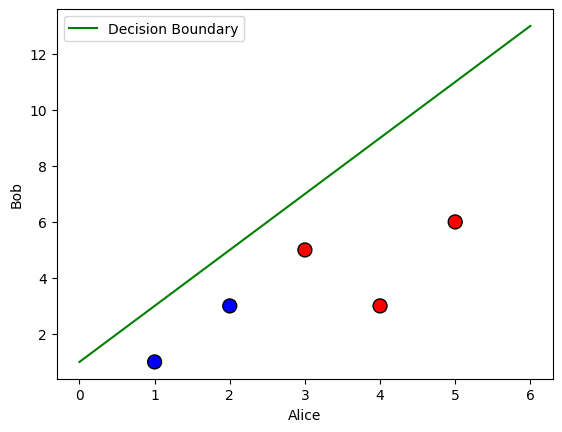

In [65]:
import numpy as np

# X3: Feature set (Alice, Bob)
X3 = [
    (1, 1),  # Movie 1
    (4, 3),  # Movie 2
    (3, 5),  # Movie 3
    (5, 6),  # Movie 4
    (2, 3)   # Movie 5
]

# t3: Target labels (Profitable? -> 1 for 'yes', 0 for 'no')
t3 = [
    0,  # Movie 1 -> 'no'
    1,  # Movie 2 -> 'yes'
    1,  # Movie 3 -> 'yes'
    1,  # Movie 4 -> 'yes'
    0   # Movie 5 -> 'no'
]

# Plotting with our current weights
bias = 1
w1 = 2
w2 = 0

# Plotting X3 data points colored with their class from t3 
# Convert X3 into separate lists for easier plotting
X1_vals = [x[0] for x in X3]  # Alice's values (x1)
X2_vals = [x[1] for x in X3]  # Bob's values (x2)

# Create a scatter plot of the points, colored by class
plt.scatter(X1_vals, X2_vals, c=t3, cmap='bwr', edgecolor='k', s=100)
plt.xlabel('Alice')
plt.ylabel('Bob')

# Plot the decision boundary
# Create x values for the decision boundary line
x_vals = np.linspace(min(X1_vals) - 1, max(X1_vals) + 1, 100)

# Compute the corresponding y values (x2 values) for the decision boundary
# Using the equation x2 = -(w1/w2) * x1 - (bias/w2)
y_vals = bias + w1*x_vals + w2*x_vals

# Plot the decision boundary line
plt.plot(x_vals, y_vals, 'g-', label='Decision Boundary')

# Add a legend
plt.legend()

# Show the plot
plt.show()


We can see that the model cannot yet separate our data

### Exercise IV
More generally, irrespective of the training data, you want to know if your features are powerful enough to allow you to handle a range of scenarios. Which of the following scenarios can a perceptron using the features above  indeed perfectly classify movies which are profitable according to the given rules:

1. Your reviewers are awesome: if the total of their scores is more than 8, then the movie will definitely be profitable, and otherwise it won't be.

2. Your reviewers are art critics. Your movie will be profitable if and only if each reviewer gives either a score of 3 or a score of 4.

3. Your reviewers have weird but different tastes. Your movie will be profitable if and only if both reviewers agree.

Answer:

1. The data would be linearly separable, and we would be able to correctly classify the data.
2. The dataset is not linearly separable. When both reviewers give over, or under the scores, it is classified as non-profitable. Meaning, that the we could "circle" the scores that are profitable, but not use a binary classifier. 
3. In this case the profitable would be, if and only if both agree on the same score. This would make profitable on a straight line. This is again not possible to classify with the binary classifier. 

## Part 2: Implementing the Perceptron Classifier

### Exercise V
We will implement the perceptron classifier. We will implement it as a class similarly to how we implemented the *k*NN-classifier last week. You should implement the two methods `fit` and `predict`. You don't need an `__init__` method. You may include other methods if you find them convenient.

The main part of the perceptron classifier is the `fit` method that trains the perceptron.
`eta` is the learning rate.
One `epoch` is a run through all the training data.
We have set the default to one epoch, but you might need more.
Remember to add the bias to the data.

In [66]:
class PyClassifier():
    """Common methods to all Python classifiers --- if any
    
    Nothing here yet"""

    def h_step(self, val: float) -> int:
        if(val >= 0):
            return 1
        return 0

In [67]:
import random 
class PyPerClassifier(PyClassifier):
    """Simple perceptron python classifier"""
    
    def fit(self, X_train, y_train, eta=1, epochs=1, until_halt=False, bias=None):
        """Train the self.weights on the training data with learning
        rate eta, running epochs many epochs"""
        if bias is None:
            self.bias = random.random()
        else:
            self.bias = bias

        self.weights = [random.random() for _ in range(2)]

        # Check if train until halt option is set
        if not until_halt:
            # Train for each epoch
            for _ in range(epochs):
                # Go through data set
                for (x, y) in zip(X_train,y_train):
                    target = y
                    guess = self.predict(x)

                    # Check if we need to change the weights
                    if guess != target:
                        # Update the weights and bias
                        for i in range(len(self.weights)):
                            # Update weights using the perceptron rule
                            self.weights[i] += eta * (target - guess) * x[i]
                        # Update the bias
                        self.bias += eta * (target - guess)

        else:
            epoch_count = 0
            while(True):
                # Go through data set
                epoch_count += 1
                has_updates = False
                for (x, y) in zip(X_train,y_train):
                    target = y
                    guess = self.predict(x)

                    # Check if we need to change the weights
                    if guess != target:
                        # Update the weights and bias
                        for i in range(len(self.weights)):
                            # Update weights using the perceptron rule
                            self.weights[i] += eta * (target - guess) * x[i]
                        # Update the bias
                        self.bias += eta * (target - guess)
                        has_updates = True
                
                if not has_updates:
                    break


            # Print model epoch count 
            print(f"Model trained after {epoch_count} epochs")

    def print_model(self):
        print("Perceptron Model:")
        print(f"Bias: {self.bias:.4f}")
        for i, weight in enumerate(self.weights):
            print(f"Weight {i+1}: {weight:.4f}")
    
    def predict(self, X):
        """Predict the class for the items (in the list) X"""
        linear_output = self.bias + sum(w * xi for w, xi in zip(self.weights, X))
        return self.h_step(linear_output)


## Dataset
We will train and test the classifier on the same sythetic dataset as we used for the *k*NN last week.

In [68]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X_np, y_np = make_blobs(n_samples=200, centers=[[0,0],[1,2]], 
                  n_features=2, random_state=2019)
X1 = [(X_np[i,0], X_np[i,1]) for i in range(X_np.shape[0])]
t1 = [y_np[i] for i in range(X_np.shape[0])]

In [69]:
def show(X, y, marker='.'):
    labels = set(y)
    cl = {lab : [] for lab in labels}
    # cl[lab] shall contain the datapoints labeled lab
    for (a, b) in zip(X, y):
        cl[b].append(a)
    for lab in labels:
        plt.plot([a[0] for a in cl[lab]], [a[1] for a in cl[lab]], 
                 marker, label="class {}".format(lab))
    plt.legend()

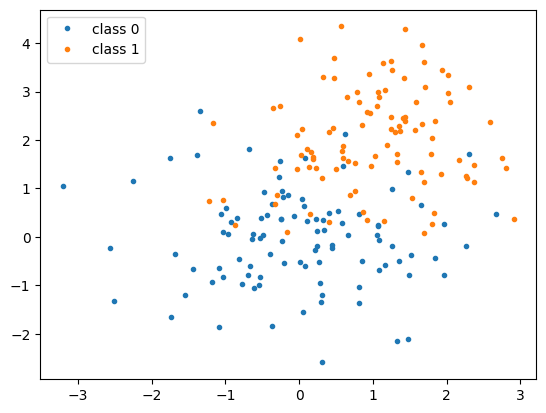

In [70]:
show(X1, t1)

In [71]:
X_np, y_np = make_blobs(n_samples=200, centers=[[0,0],[1,2]], 
                  n_features=2, random_state=2020)
X2 = [(X_np[i,0], X_np[i,1]) for i in range(X_np.shape[0])]
t2 = [y_np[i] for i in range(X_np.shape[0])]

### Exercise VI
Train PyPerClassifier on  X1, t1 and test on X2, t2 as with the *k*NN-classifier. Try various numbers of epochs and see whether it makes a difference.

Is X2, t2 linearly separable?

How does the results compare to the *k*NN classifier from last week?

In [72]:
# New perceptron classifier
perceptron = PyPerClassifier()

perceptron.fit(X_train=X1, y_train=t1, eta=1,epochs=1)

# Test method

def test_accuracy(model, X_test, y_test):
    """Test the perceptron accuracy on the test set X_test and y_test."""
    correct_predictions = 0
    total_samples = len(y_test)
    
    for x, true_label in zip(X_test, y_test):
        predicted_label = model.predict(x)
        if predicted_label == true_label:
            correct_predictions += 1
    
    accuracy = correct_predictions / total_samples
    return accuracy


# Test accuracy on X2, T2
accuracy = test_accuracy(perceptron, X2, t2)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 82.50%


### Exercise VII: Termination and Weights

- Modify the *fit*-method of the classifier such that training halts when there are no more updates, and it is possible to inspect how many epochs it took.
- Run this on the five points film critics dataset. How many epochs does it take to reach completion?
- What are the final weights? Can you plot the decision boundary that corresponds to these weights together with the data set?

In [73]:
# Run until halts with bias = -1
perceptron = PyPerClassifier()
perceptron.fit(X_train=X3, y_train=t3, until_halt=True, bias=-1)

# Test accuracy on itself
test_accuracy(perceptron, X3, t3)

# Print model
perceptron.print_model()

Model trained after 8 epochs
Perceptron Model:
Bias: -5.0000
Weight 1: 3.7196
Weight 2: -1.1327


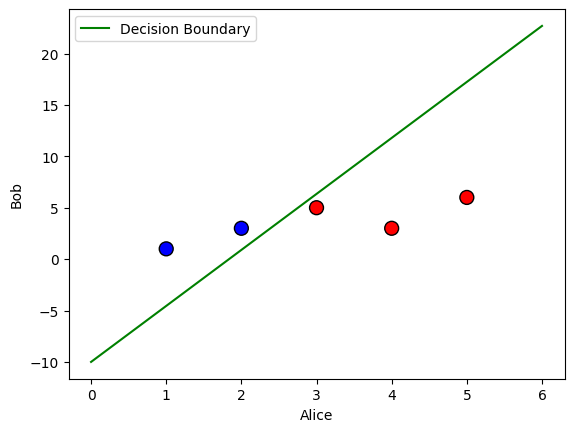

In [74]:
import numpy as np

# Plotting the model linear boundary 
bias = -10
w1 = 8.1407
w2 = -2.6934

# Plotting X3 data points colored with their class from t3 
# Convert X3 into separate lists for easier plotting
X1_vals = [x[0] for x in X3]  # Alice's values (x1)
X2_vals = [x[1] for x in X3]  # Bob's values (x2)

# Create a scatter plot of the points, colored by class
plt.scatter(X1_vals, X2_vals, c=t3, cmap='bwr', edgecolor='k', s=100)
plt.xlabel('Alice')
plt.ylabel('Bob')

# Plot the decision boundary
# Create x values for the decision boundary line
x_vals = np.linspace(min(X1_vals) - 1, max(X1_vals) + 1, 100)

# Compute the corresponding y values (x2 values) for the decision boundary
# Using the equation x2 = -(w1/w2) * x1 - (bias/w2)
y_vals = bias + w1*x_vals + w2*x_vals

# Plot the decision boundary line
plt.plot(x_vals, y_vals, 'g-', label='Decision Boundary')

# Add a legend
plt.legend()

# Show the plot
plt.show()
